<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/PyCaretModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install PyCaret
!pip install pycaret[full]

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pycaret.regression import *

# Set display results
pd.options.display.float_format = '{:,.4f}'.format
%config InlineBackend.figure_format = 'retina'

# PyCaret version
print(f'PyCaret version: {pycaret.__version__}')

/content/drive/My Drive/Colab Notebooks/rvData
PyCaret version: 2.3.0


In [ ]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/naenumtou/statisticalModel/main/datasets/carData.csv')
df.head(5)

,carModel,carBrand,vehicleType,Year,sellingPrice,newPrice,kmDriven,fuelType,sellerType,gearType,owner
0,3g,Honda,bike,2008,0.1700,0.5200,500000,Petrol,Individual,Automatic,0
1,access,Suzuki,bike,2008,0.2500,0.5800,1900,Petrol,Individual,Automatic,0
2,activa,Honda,bike,2017,0.4800,0.5100,4300,Petrol,Individual,Automatic,0
3,activa,Honda,bike,2017,0.4500,0.5100,4000,Petrol,Individual,Automatic,0
4,activa,Honda,bike,2016,0.4500,0.5400,500,Petrol,Individual,Automatic,0


In [ ]:
# Create 'age' variable
df['age'] = 2018 - df['Year'] #Using 2018 as latest year 
df = df[df['age'] <= 10] #Drop data more than 10 years

# Select only 'car' for model
df = df[df['vehicleType'] == 'car']
print(f'Total data avaliable: {df.shape[0]}')

Total data avaliable: 215


In [ ]:
# Create 'RV' as target
df['RV'] = df['sellingPrice'] / df['newPrice']
df['logRV'] = np.log(df['RV'])
df.head(5)

,carModel,carBrand,vehicleType,Year,sellingPrice,newPrice,kmDriven,fuelType,sellerType,gearType,owner,age,RV,logRV
7,alto,Suzuki,car,2017,2.8500,3.6000,2135,Petrol,Dealer,Manual,0,1,0.7917,-0.2336
8,alto,Suzuki,car,2016,2.8500,3.9500,25000,Petrol,Dealer,Manual,0,2,0.7215,-0.3264
9,alto,Suzuki,car,2014,2.5000,3.4600,45280,Petrol,Dealer,Manual,0,4,0.7225,-0.3250
10,alto,Suzuki,car,2010,1.9500,3.9500,44542,Petrol,Dealer,Manual,0,8,0.4937,-0.7059
12,alto,Suzuki,car,2016,3.0000,3.7600,10079,Petrol,Dealer,Manual,0,2,0.7979,-0.2258


In [ ]:
# Checking data before model devlopment
print(df.isnull().sum())

carModel        0
carBrand        0
vehicleType     0
Year            0
sellingPrice    0
newPrice        0
kmDriven        0
fuelType        0
sellerType      0
gearType        0
owner           0
age             0
RV              0
logRV           0
dtype: int64


In [ ]:
# Set up model
regression = setup(df,
                   target = 'logRV',
                   train_size = 0.8,
                   categorical_features = ['carModel',
                                           'carBrand',
                                           'fuelType',
                                           'gearType',
                                           'owner'],
                   categorical_imputation = 'constant',
                   numeric_features = ['kmDriven',
                                       'age'],
                   numeric_imputation = 'mean', 
                   normalize = True,
                   normalize_method = 'minmax',
                   handle_unknown_categorical = True, 
                   unknown_categorical_method = 'least_frequent', 
                   polynomial_features = True,
                   polynomial_degree = 2,
                   ignore_features = ['Year',
                                      'vehicleType',
                                      'sellingPrice',
                                      'newPrice',
                                      'sellerType',
                                      'RV'],
                   fold = 5,
                   n_jobs = -1,
                   use_gpu = True)

,Description,Value
0,session_id,3519
1,Target,logRV
2,Original Data,"(215, 14)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(172, 49)"


In [ ]:
# Compare models
estimatedModels = compare_models(include = ['ridge',
                                            'catboost',
                                            'gbr',
                                            'rf',
                                            'et',
                                            'ada',
                                            'knn',
                                            'lightgbm',
                                            'dt',
                                            'lr',
                                            'lasso',
                                            'xgboost',
                                            'en',
                                            'svm'],
                                 sort = 'R2',
                                 n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0990,0.0167,0.1281,0.8476,0.0835,0.4596,1.9940
ridge,Ridge Regression,0.1023,0.0163,0.1273,0.8410,0.0852,0.4689,0.0300
gbr,Gradient Boosting Regressor,0.1005,0.0175,0.1320,0.8340,0.0869,0.4596,0.0600
svm,Support Vector Regression,0.1057,0.0174,0.1316,0.8321,0.0888,0.5477,0.0320
rf,Random Forest Regressor,0.1134,0.0214,0.1457,0.7969,0.0941,0.5220,1.0980
et,Extra Trees Regressor,0.1111,0.0220,0.1481,0.7844,0.0977,0.4839,0.8660
ada,AdaBoost Regressor,0.1266,0.0268,0.1631,0.7482,0.1060,0.6335,0.0900
lightgbm,Light Gradient Boosting Machine,0.1338,0.0300,0.1717,0.7151,0.1098,0.5589,0.0280
dt,Decision Tree Regressor,0.1414,0.0375,0.1903,0.6687,0.1216,0.5921,0.0100
knn,K Neighbors Regressor,0.1666,0.0481,0.2184,0.5487,0.1403,0.9621,0.0180


In [ ]:
# Select model
model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0920,0.0159,0.1262,0.8794,0.0825,0.6062
1,0.1236,0.0237,0.1540,0.8452,0.0940,0.3855
2,0.0795,0.0103,0.1015,0.8239,0.0670,0.2148
3,0.1060,0.0187,0.1367,0.8301,0.0883,0.6903
4,0.0938,0.0149,0.1221,0.8595,0.0856,0.4013
Mean,0.0990,0.0167,0.1281,0.8476,0.0835,0.4596
SD,0.0149,0.0044,0.0173,0.0201,0.0091,0.1694


In [ ]:
# Final model
finalModel = finalize_model(model)

In [ ]:
# Model prediction
prediction = predict_model(finalModel,
                           data = df)

In [ ]:
# Prediction results
prediction = prediction[['age', 'RV', 'Label' ]] #Return as dataframe

# Inverse target varialbe
prediction['predictedRV'] = np.exp(prediction['Label'])

# Average RV by year
averageRV = prediction.groupby(['age'], as_index = False)['RV'].mean()
averageRV['predictedRV'] = list(prediction.groupby(['age'])['predictedRV'].mean())

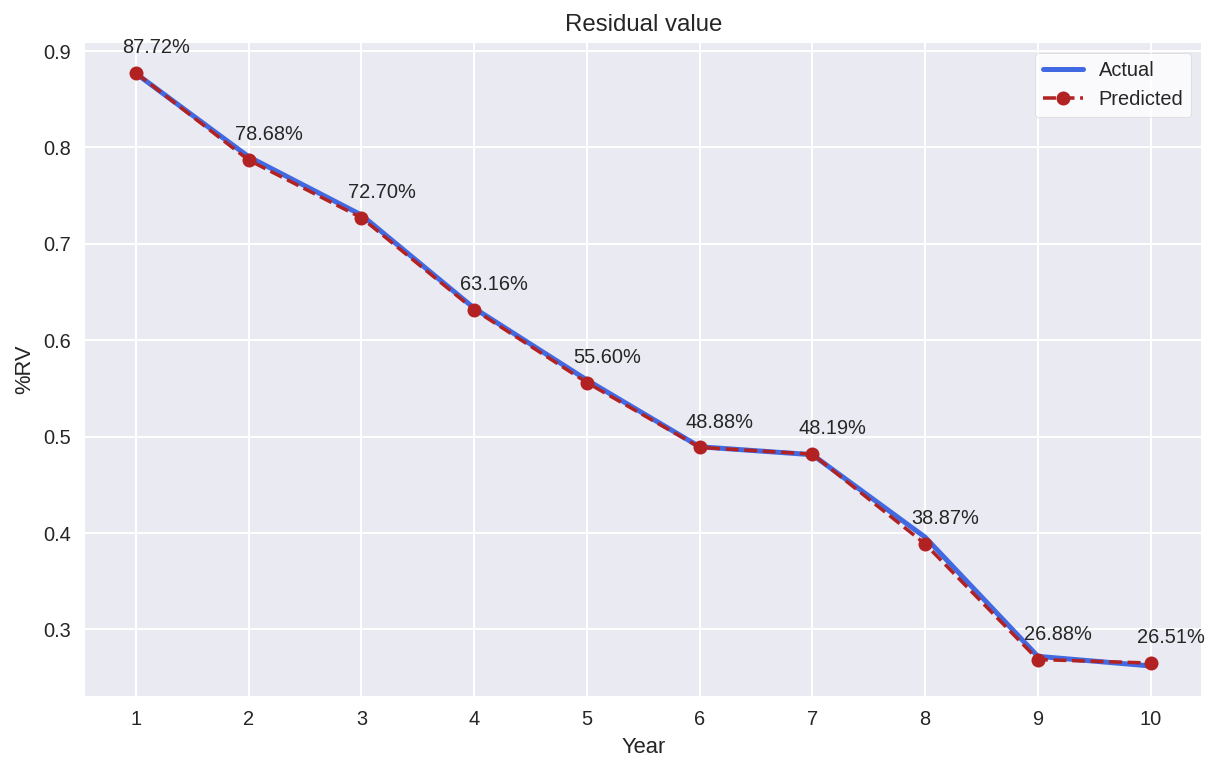

In [ ]:
#Plot results
plt.figure(figsize = (10, 6))
with plt.style.context('seaborn'):
  plt.title('Residual value')
  plt.xlabel('Year')
  plt.ylabel('%RV')
  plt.plot(range(1, averageRV.shape[0] + 1), averageRV['RV'], c = 'royalblue', linewidth = 2.5, label = 'Actual')
  plt.plot(range(1, averageRV.shape[0] + 1), averageRV['predictedRV'], c = 'firebrick', linestyle = '--', marker = 'o', label = 'Predicted')
  plt.xticks(list(range(1, averageRV.shape[0] + 1)), averageRV['age'])
  for i, rv in enumerate(averageRV['predictedRV']):
    rvLabel = f'{rv * 100:.2f}%'
    plt.annotate(rvLabel, (i + 1, rv), textcoords = 'offset points', xytext = (10, 10), ha = 'center')
  plt.legend(frameon = True, facecolor = 'white')
  plt.show()

In [ ]:
# Save model
save_model(finalModel, 'RVModel')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['carModel',
                                                             'carBrand',
                                                             'fuelType',
                                                             'gearType',
                                                             'owner'],
                                       display_types=True,
                                       features_todrop=['Year', 'vehicleType',
                                                        'sellingPrice',
                                                        'newPrice', 'sellerType',
                                                        'RV'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['kmDriven', 'age'],
                                       target='logRV', time_features=[]))

In [ ]:
# Load model (Only can use PyCaret to load pickle model)
loadModel = load_model('RVModel') 
load_model

Transformation Pipeline and Model Successfully Loaded


<function pycaret.regression.load_model>